# Webscrapping
<b> <i> refrence from automate the boring stuff with python Chapter 12 : web scraping </i> </b>
Web scraping is the term for using a program to download and process content from the Web

webbrowser Comes with Python and opens a browser to a specific page.

requests Downloads files and web pages from the internet.

bs4 Parses HTML, the format that web pages are written in.

selenium Launches and controls a web browser. The selenium module is able to fill in forms and simulate mouse clicks in this browser

In [2]:
import webbrowser
webbrowser.open('https://inventwithpython.com/')

True

In [3]:
import requests
res = requests.get('https://automatetheboringstuff.com/files/rj.txt')
type(res)

requests.models.Response

In [7]:
res.status_code == requests.codes.ok
len(res.text)

178978

In [5]:
print(res.text[:250])

The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Projec


In [2]:
pip install pyperclip

  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=9ede1dc50c39673c32966da8ae717ee6091de421a41664190f5a8a41aaec6161
  Stored in directory: c:\users\bhuvan allu\appdata\local\pip\cache\wheels\0c\09\9e\49e21a6840ef7955b06d47394afef0058f0378c0914e48b8b8
Successfully built pyperclip
Note: you may need to restart the kernel to use updated packages.


In [5]:
#! python3
# mapIt.py - Launches a map in the browser using an address from the
# command line or clipboard.
import webbrowser, sys, pyperclip
if len(sys.argv) > 1:
    #Get address from command line.
    address = ' '.join(sys.argv[1:])
else:
# Get address from clipboard.
    address = pyperclip.paste()
webbrowser.open('https://www.google.com/maps/place/' + address)

True

## request
The requests module lets you easily download files from the Web without having to
worry about complicated issues such as network errors, connection problems, and data
compression. The requests module doesn’t come with Python, so you’ll have to install it
first. From the command line, run "pip install requests"

### Downloading a Web Page with the requests.get() Function
The requests.get()function takes a string of a URL to download. By calling type() on
requests.get()’s return value, you can see that it returns a Response object, which
contains the response that the web server gave for your request.

In [8]:
import requests
res = requests.get(r'http://www.gutenberg.org/cache/epub/1112/pg1112.txt')
type(res)
if res.status_code == requests.codes.ok:
    len(res.text)
    print(res.text[:350])


﻿The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare


*******************************************************************
THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A
TIME WHEN PROOFING METHODS AND TOOLS WERE NOT WELL DEVELOPED. THERE
IS AN IMPROVED EDITION OF THIS TITLE WHICH MAY BE VIEWED AS EBOOK


In [9]:
res = requests.get('http://inventwithpython.com/page_that_does_not_exist')
res.raise_for_status()

HTTPError: 404 Client Error: Not Found for url: http://inventwithpython.com/page_that_does_not_exist

In [10]:
import requests
res = requests.get('http://inventwithpython.com/page_that_does_not_exist')
try:
    res.raise_for_status()
except Exception as e:
    print('There was a problem: %s' %(e))
    


There was a problem: 404 Client Error: Not Found for url: http://inventwithpython.com/page_that_does_not_exist


In [22]:
res = requests.get('http://www.gutenberg.org/cache/epub/1112/pg1112.txt')
try:
    res.raise_for_status()
except Exception as e:
    print('There was a problem : %s' %(e))
else:
    with open('RomeoAndJuliet.txt', 'wb') as f:
        for chunk in res.iter_content(100000):
            f.write(chunk)
finally:
    print("This is finally")


This is finally


In [24]:
with open('RomeoAndJuliet.txt', 'rb') as f:
    content = f.read()
print(content)


## Parsing HTML with the BeautifulSoup Module
Beautiful Soup is a module for extracting information from an HTML page (and is much
better for this purpose than regular expressions). The BeautifulSoup module’s name is
bs4 (for Beautiful Soup, version 4). To install it, you will need to run pip install
beautifulsoup4 from the command line.  While beautifulsoup4 is the name used for installation,
to import Beautiful Soup you run import bs4.
#### Creating a BeautifulSoup Object from HTML
The bs4.BeautifulSoup() function needs to be called with a string containing the HTML
it will parse. The bs4.BeautifulSoup() function returns is a BeautifulSoup object

In [28]:
import requests, bs4
res = requests.get('http://nostarch.com')
try:
    res.raise_for_status()
except Exception as e:
    print('There was a problem %s' %(e))
else:
    noStarchSoup = bs4.BeautifulSoup(res.text)
type(noStarchSoup)

bs4.BeautifulSoup

### Finding an Element with the select() Method
You can retrieve a web page element from a BeautifulSoup object by calling the
select()method and passing a string of a CSS selector for the element you are looking
for. Selectors are like regular expressions: They specify a pattern to look for, in this case,
in HTML pages instead of general text strings.


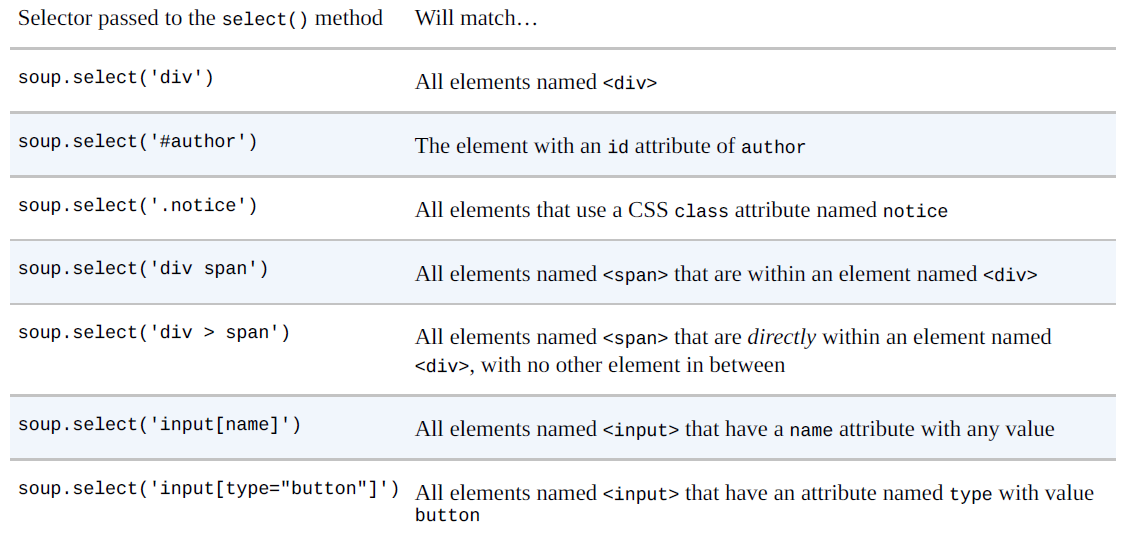

The various selector patterns can be combined to make sophisticated matches. For
example, soup.select('p #author') will match any element that has an id attribute of author, as long as it is also inside a paragraph 'p' element
    
    The select() method will return a list of Tag objects, which is how Beautiful Soup
represents an HTML element. The list will contain one Tag object for every match in the
BeautifulSoup object’s HTML. Tag values can be passed to the str() function to show
the HTML tags they represent. Tag values also have an attrs attribute that shows all the
HTML attributes of the tag as a dictionary

In [33]:
import bs4
with open(r'example.html') as f:
    exampleSoup = bs4.BeautifulSoup(f.read())
    elems = exampleSoup.select('#author')
print(type(elems))
len(elems)

<class 'bs4.element.ResultSet'>


1

In [34]:
type(elems[0])

bs4.element.Tag

In [35]:
elems[0].getText()

'Al Sweigart'

In [36]:
str(elems[0])

'<span id="author">Al Sweigart</span>'

In [37]:
elems[0].attrs

{'id': 'author'}

## Getting Data from an Element’s Attributes
The get() method for Tag objects makes it simple to access attribute values from an
element. The method is passed a string of an attribute name and returns that attribute’s
value


In [38]:
soup = bs4.BeautifulSoup(open('example.html'))
spanElem = soup.select('span')[0]
str(spanElem)
spanElem.get('id')
spanElem.get('some_nonexistent_addr') == None
spanElem.attrs

{'id': 'author'}